In [1508]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

Загрузим данные по Европе

In [1509]:
df_eu = pd.read_csv('/content/LI_eu.csv')
df_eu.head()

,Unnamed: 0,vacancy_name,company_name,city,date,workplace_type,area,level,speciality,schedule,salary,python,sql,apache,java
0,0,Data Engineer,Summ.link,"Гент, Фландерс, Бельгия",1 неделю назад,Удаленная работа,Бельгия,junior,data engineer,1,0,0,0,0,0
1,1,Analityk/Analityczka Danych HR,GFT Group,Польша,2 недели назад,Гибридный формат работы,Польша,middle,unknown,1,0,0,0,0,0
2,2,DATA SCIENTIST - H/F - (CDI-3533),Banque de France,Франция,3 недели назад,Работа в офисе,Франция,middle,unknown,1,0,0,0,0,0
3,3,Data scientist - Hitelkockázati modell validátor,OTP Bank,"Будапешт, Венгрия",1 день назад,Гибридный формат работы,Венгрия,middle,data scientist,1,0,1,1,0,0
4,4,Junior Data Scientist - Credit Risk Analyst,CRIF,"Прага, Прага, Чехия",2 недели назад,Гибридный формат работы,Чехия,junior,data scientist,1,0,1,0,0,0


Загрузим данные по Америке

In [1510]:
df_us = pd.read_csv('/content/LI_usa.csv')
df_us.head()

,Unnamed: 0,vacancy_name,company_name,city,date,workplace_type,level,speciality,area,schedule,salary,python,sql,apache,java
0,0,(USA) 2023 Full Time: Sam's Club Sr. Data Scie...,Sam's Club,"Бентонвилл, AR",1 неделю назад,Работа в офисе,middle,data scientist,USA,1,0,1,0,0,0
1,1,Senior Data Scientist,Tecolote Research,"Fort George G. Meade, MD",3 недели назад,Работа в офисе,senior,data scientist,USA,1,0,1,1,0,0
2,2,Portfolio Data Analyst,Mosaic,"Хьюстон, TX",4 дня назад,Работа в офисе,middle,data analyst,USA,1,1,0,0,0,0
3,3,Data Scientist - Risk Analytics,John Deere,"Johnston, IA",2 недели назад,Работа в офисе,middle,data scientist,USA,1,0,1,1,0,0
4,4,Principal Data Scientist - Pricing & Marketing,CoinFlip,"Чикаго, IL",1 неделю назад,Работа в офисе,junior,data scientist,USA,1,0,1,1,0,0


Загрузим данные по России

In [1511]:
df_ru = pd.read_csv('/content/ds_df.csv')
df_ru.head()

,Unnamed: 0,Unnamed: 0.1,full_name,speciality,level,area,salary,employer,schedule,remote,skills,date,python,sql,pytorch,apache,git,java,eng
0,0,0,Аналитик / Data Science (Москва),data scientist,unknown,Москва,1,other,1,0,{'requirement': 'Серьезную математическую подг...,2022-11-28,1,0,1,0,0,0,Moscow
1,1,1,Аналитик / Data scientist,data scientist,unknown,Москва,0,other,1,1,{'requirement': 'Знание основ мат. статистики ...,2022-11-21,1,0,1,0,0,0,Moscow
2,2,2,Аналитик данных (data analyst / data scientist),data scientist,unknown,Москва,1,other,1,0,{'requirement': 'Высшее образование (техническ...,2022-12-02,1,1,1,0,0,0,Moscow
3,3,3,Аналитик данных (Data Scientist),data scientist,unknown,Москва,1,other,1,0,{'requirement': 'Высшее техническое образовани...,2022-12-08,1,0,1,0,0,0,Moscow
4,4,4,Аналитик данных / Data scientist,data scientist,unknown,Москва,0,other,0,0,{'requirement': 'Обязательно: 1. Опыт работы <...,2022-12-19,0,0,1,0,0,0,Moscow


# Предобработка данных

Объединим три датасета в один. Для этого приведем структуру к одному виду.

In [1512]:
df_ru = df_ru.rename (columns= {'full_name': 'vacancy_name', 'area': 'city', 'remote': 'workplace_type', 'employer': 'company_name'})

In [1513]:
df_ru['city'] = df_ru['eng']

In [1514]:
df_ru = df_ru.drop(['eng'], axis=1)

In [1515]:
df_ru.loc[df_ru['workplace_type'] == 0, 'workplace_type'] = 'Работа в офисе'

In [1516]:
df_ru.loc[df_ru['workplace_type'] == 1, 'workplace_type'] = 'Удаленная работа'

In [1517]:
df_ru = df_ru.drop(['pytorch','skills', 'git'], axis=1)

In [1518]:
df_ru['area'] = 'Russia'

In [1519]:
df_ru.loc[df_ru['level'] == 'unknown', 'level'] = 'middle'

In [1520]:
df_ru.loc[df_ru['level'] == 'chief', 'level'] = 'team lead'

In [1521]:
df_ru.loc[df_ru['level'] == 'intern', 'level'] = 'junior'

In [1522]:
df = pd.concat([df_eu,df_us,df_ru], axis=0)

In [1523]:
df_ru.loc[df_ru['speciality'] == 'unknown', 'speciality'] = 'other'

In [1524]:
df_eu.loc[df_eu['speciality'] == 'unknown', 'speciality'] = 'other'

In [1525]:
df_us.loc[df_us['speciality'] == 'unknown', 'speciality'] = 'other'

In [1526]:
df.loc[df['speciality'] == 'unknown', 'speciality'] = 'other'

In [1527]:
df = df.drop(['Unnamed: 0', 'date'], axis=1)

In [1528]:
df_ru.loc[df_ru['schedule'] == 1, 'schedule'] = 'Полный рабочий день'
df_ru.loc[df_ru['schedule'] == 0, 'schedule'] = 'Частичная занятость'

In [1529]:
df_eu.loc[df_eu['schedule'] == 1, 'schedule'] = 'Полный рабочий день'
df_eu.loc[df_eu['schedule'] == 0, 'schedule'] = 'Частичная занятость'

In [1530]:
df_us.loc[df_us['schedule'] == 1, 'schedule'] = 'Полный рабочий день'
df_us.loc[df_us['schedule'] == 0, 'schedule'] = 'Частичная занятость'

In [1531]:
df.loc[df['schedule'] == 1, 'schedule'] = 'Полный рабочий день'
df.loc[df['schedule'] == 0, 'schedule'] = 'Частичная занятость'

# Анализ данных

## 1. Рабочее место

### 1.1. Россия

In [1532]:
df_ru['workplace_type'].value_counts()

Работа в офисе      138
Удаленная работа     89
Name: workplace_type, dtype: int64

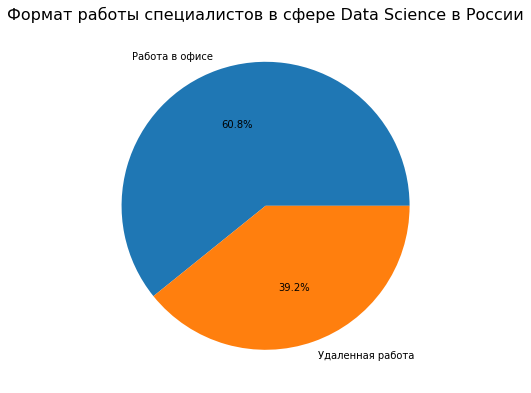

In [1533]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_ru['workplace_type'].value_counts(),
    labels=df_ru['workplace_type'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Формат работы специалистов в сфере Data Science в России', fontsize=16)
plt.show()

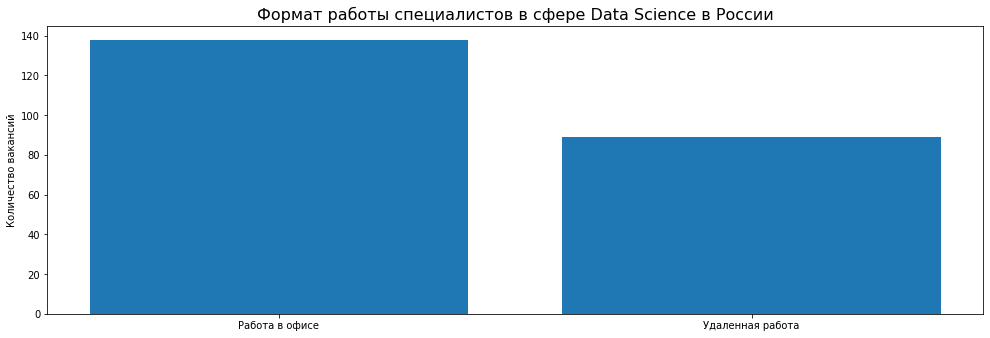

In [1534]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_ru['workplace_type'].value_counts().index, height = df_ru['workplace_type'].value_counts())
axes.set_title('Формат работы специалистов в сфере Data Science в России', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 1.2. Европа

In [1535]:
df_eu['workplace_type'].value_counts()

Работа в офисе             429
Гибридный формат работы    331
Удаленная работа           167
Name: workplace_type, dtype: int64

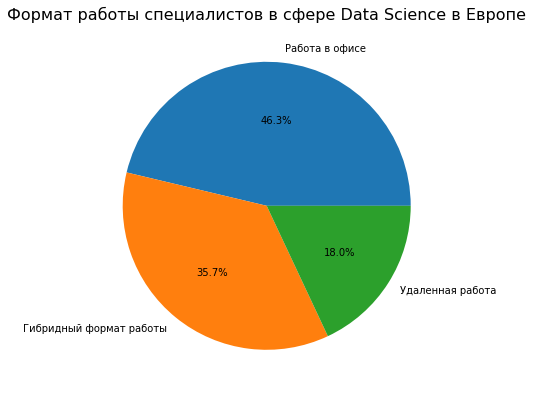

In [1536]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_eu['workplace_type'].value_counts(),
    labels=df_eu['workplace_type'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Формат работы специалистов в сфере Data Science в Европе', fontsize=16)
plt.show()


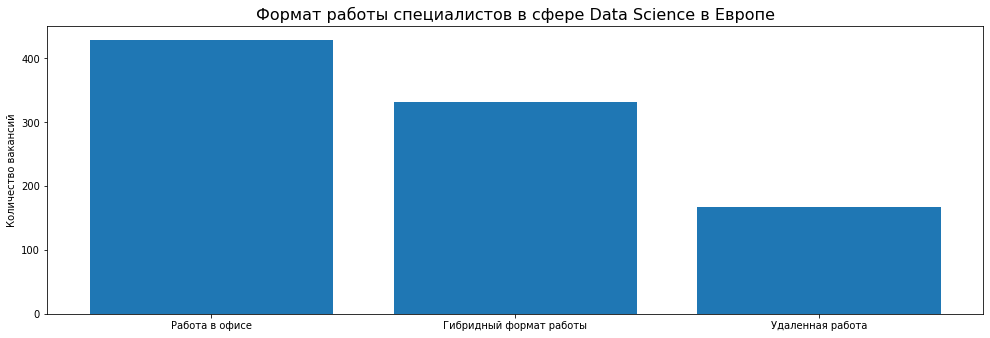

In [1537]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_eu['workplace_type'].value_counts().index, height = df_eu['workplace_type'].value_counts())
axes.set_title('Формат работы специалистов в сфере Data Science в Европе', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 1.3. США

In [1538]:
df_us['workplace_type'].value_counts()

Работа в офисе             385
Удаленная работа           199
Гибридный формат работы    150
Name: workplace_type, dtype: int64

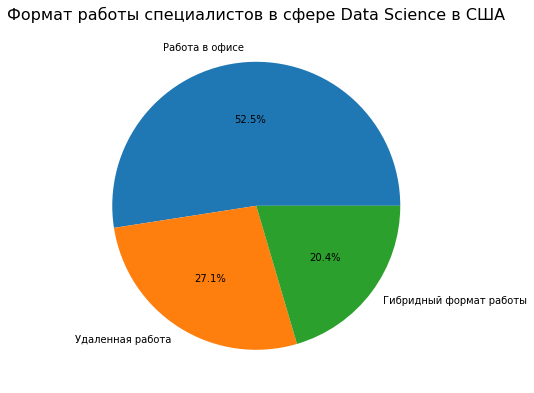

In [1539]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_us['workplace_type'].value_counts(),
    labels=df_us['workplace_type'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Формат работы специалистов в сфере Data Science в США', fontsize=16)
plt.show()

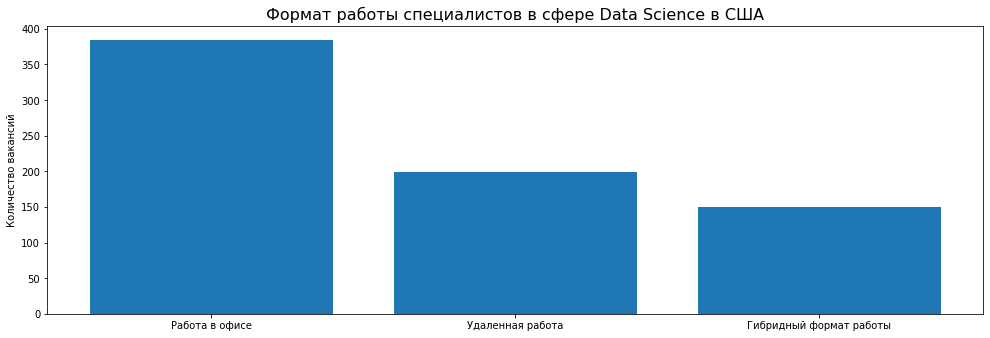

In [1540]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_us['workplace_type'].value_counts().index, height = df_us['workplace_type'].value_counts());
axes.set_title('Формат работы специалистов в сфере Data Science в США', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 1.4. Общее

In [1541]:
df['workplace_type'].value_counts()

Работа в офисе             952
Гибридный формат работы    481
Удаленная работа           455
Name: workplace_type, dtype: int64

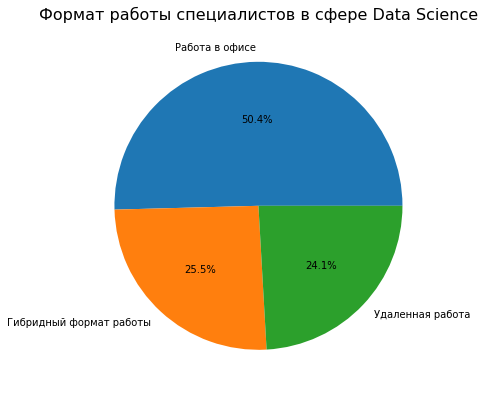

In [1542]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df['workplace_type'].value_counts(),
    labels=df['workplace_type'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Формат работы специалистов в сфере Data Science', fontsize=16)
plt.show()

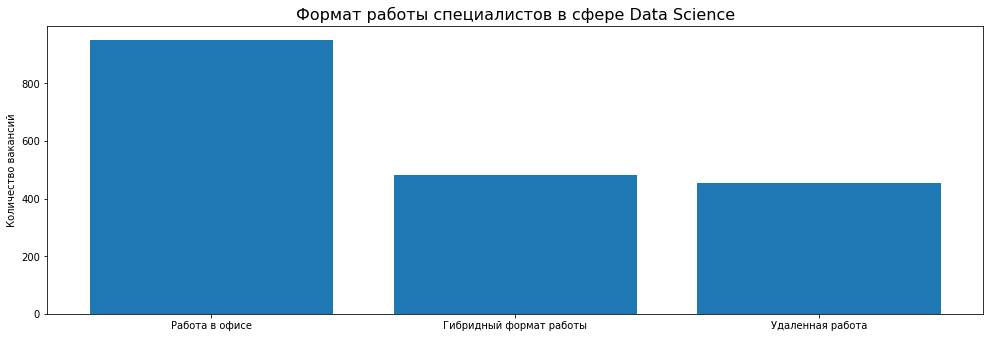

In [1543]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df['workplace_type'].value_counts().index, height = df['workplace_type'].value_counts());
axes.set_title('Формат работы специалистов в сфере Data Science', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

**Вывод:** в Европе самое лояльное отношение к удаленному и гибридному формату работы (более 53% вакансий).
В целом по миру наблюдается паритет межды офисным форматом работы и возможностью работать в удаленном формате 

## 2. Позиции

### 2.1. Россия

In [1544]:
df_ru['level'].value_counts()

middle       142
senior        58
team lead     18
junior         9
Name: level, dtype: int64

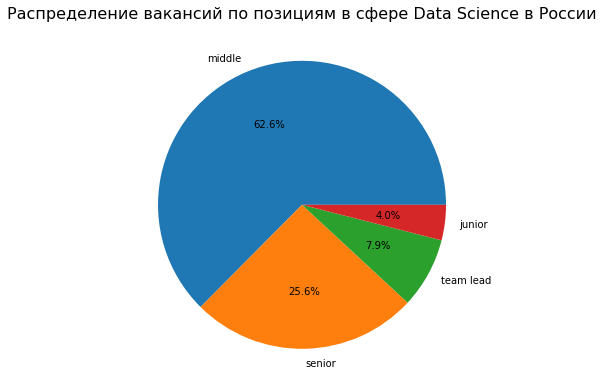

In [1545]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_ru['level'].value_counts(),
    labels=df_ru['level'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение вакансий по позициям в сфере Data Science в России', fontsize=16)
plt.show()

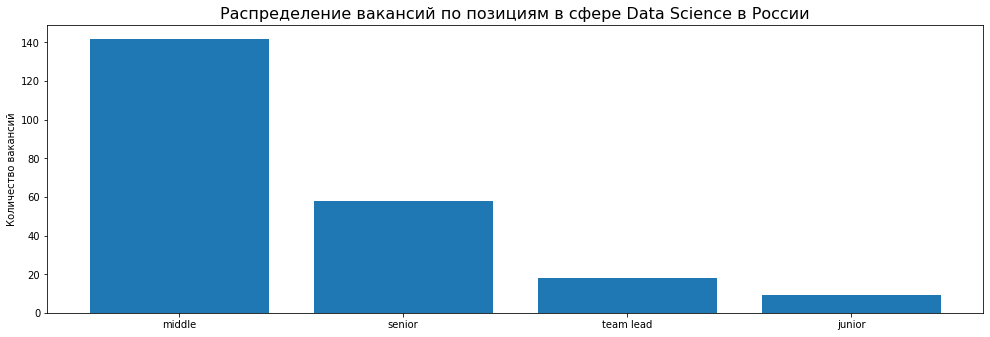

In [1546]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_ru['level'].value_counts().index, height = df_ru['level'].value_counts());
axes.set_title('Распределение вакансий по позициям в сфере Data Science в России', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 2.2. Европа

In [1547]:
df_eu['level'].value_counts()

middle       688
senior       137
junior        76
team lead     26
Name: level, dtype: int64

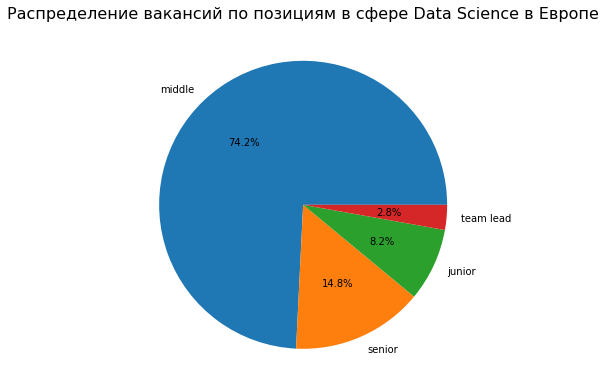

In [1548]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_eu['level'].value_counts(),
    labels=df_eu['level'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение вакансий по позициям в сфере Data Science в Европе', fontsize=16)
plt.show()

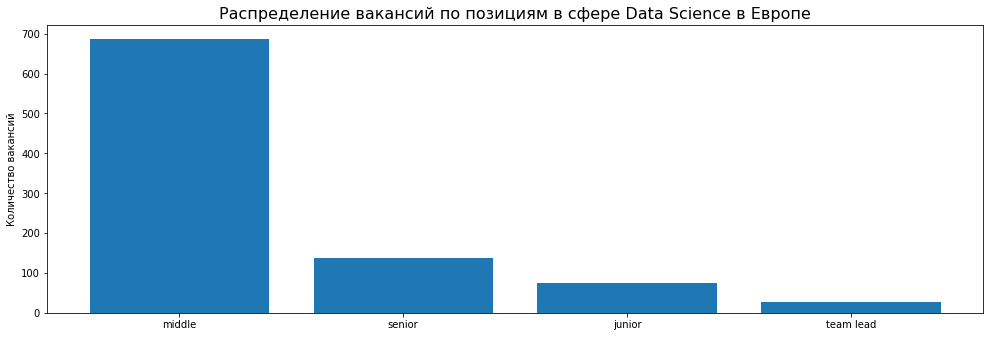

In [1549]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_eu['level'].value_counts().index, height = df_eu['level'].value_counts());
axes.set_title('Распределение вакансий по позициям в сфере Data Science в Европе', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 2.3. США

In [1550]:
df_us['level'].value_counts()

middle       488
junior       120
senior       114
team lead     12
Name: level, dtype: int64

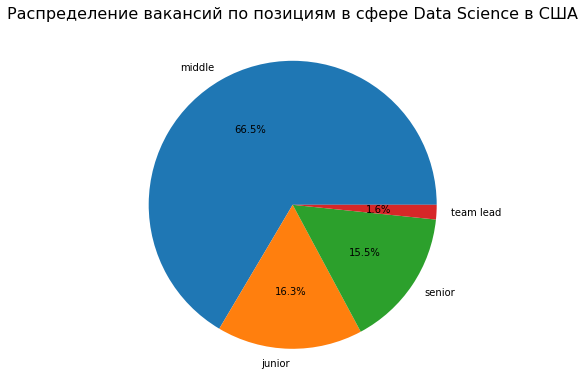

In [1551]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_us['level'].value_counts(),
    labels=df_us['level'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение вакансий по позициям в сфере Data Science в США', fontsize=16)
plt.show()

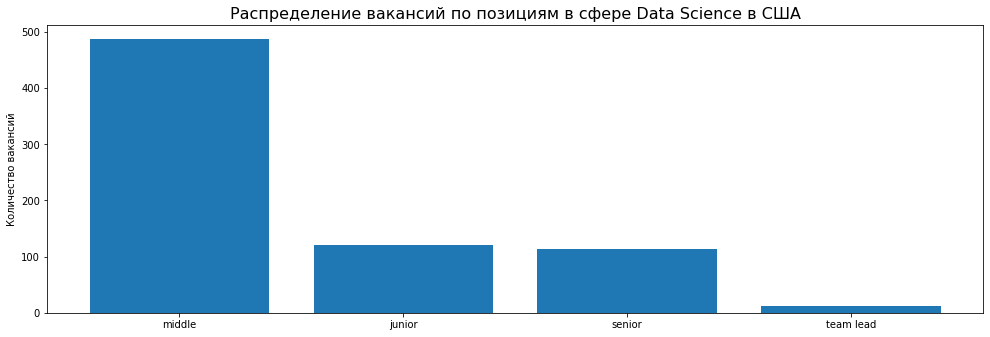

In [1552]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_us['level'].value_counts().index, height = df_us['level'].value_counts());
axes.set_title('Распределение вакансий по позициям в сфере Data Science в США', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()
print('')

### 2.4. Общее

In [1553]:
df['level'].value_counts()

middle       1318
senior        309
junior        205
team lead      56
Name: level, dtype: int64

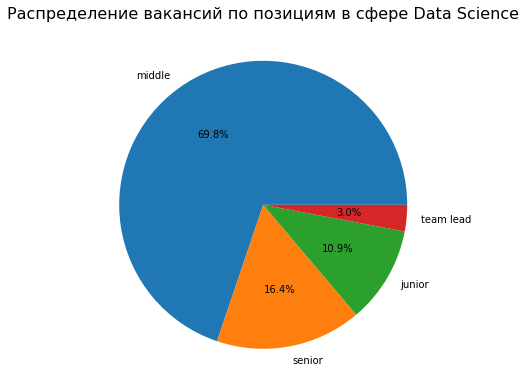

In [1554]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df['level'].value_counts(),
    labels=df['level'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение вакансий по позициям в сфере Data Science', fontsize=16)
plt.show()

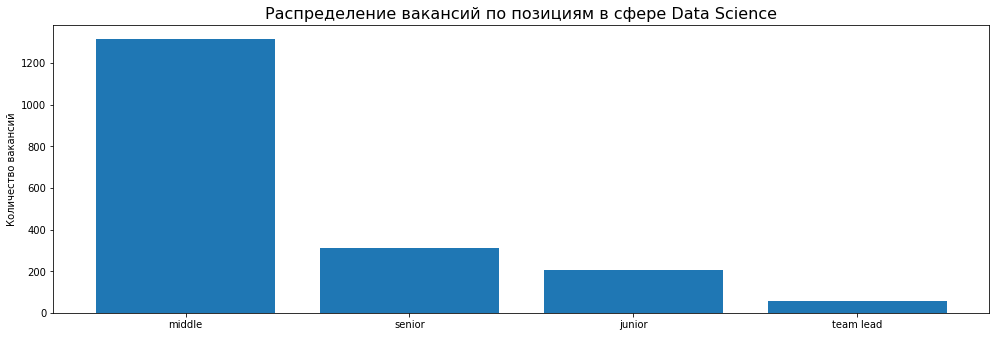

In [1555]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df['level'].value_counts().index, height = df['level'].value_counts());
axes.set_title('Распределение вакансий по позициям в сфере Data Science', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

**Вывод:** В США существует востребованность в специалистах уровня **Junior**. В России на долю этой позиции приходится всего **4%**

## 3. Специальности

### 3.1. Россия

In [1556]:
df_ru['speciality'].value_counts()

data scientist    131
data engineer      73
data analyst       23
Name: speciality, dtype: int64

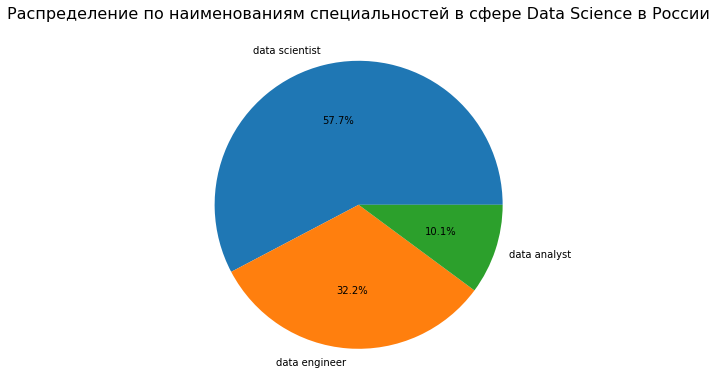

In [1557]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_ru['speciality'].value_counts(),
    labels=df_ru['speciality'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по наименованиям специальностей в сфере Data Science в России', fontsize=16)
plt.show()

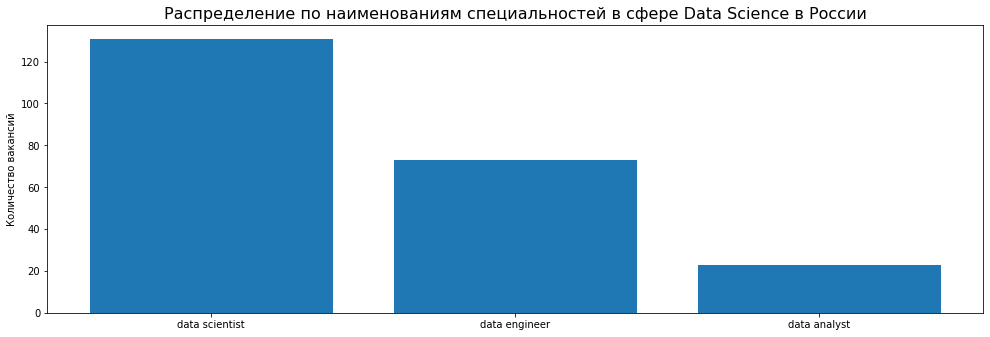

In [1558]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_ru['speciality'].value_counts().index, height = df_ru['speciality'].value_counts());
axes.set_title('Распределение по наименованиям специальностей в сфере Data Science в России', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 3.2. Европа

In [1559]:
df_eu['speciality'].value_counts()

data engineer     467
data scientist    280
other             160
data analyst       20
Name: speciality, dtype: int64

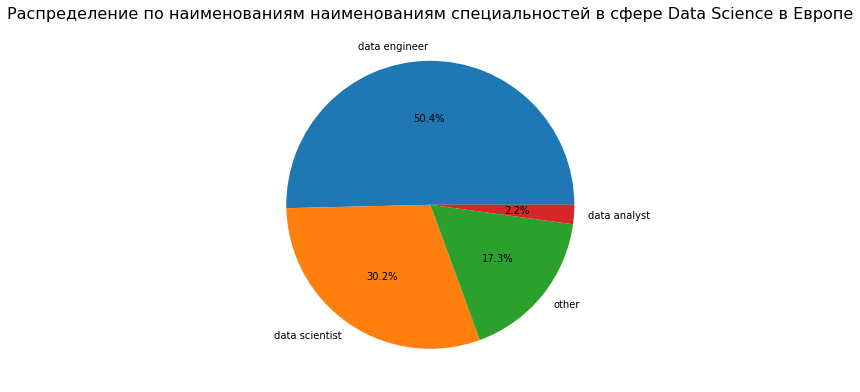

In [1560]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_eu['speciality'].value_counts(),
    labels=df_eu['speciality'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по наименованиям наименованиям специальностей в сфере Data Science в Европе', fontsize=16)
plt.show()

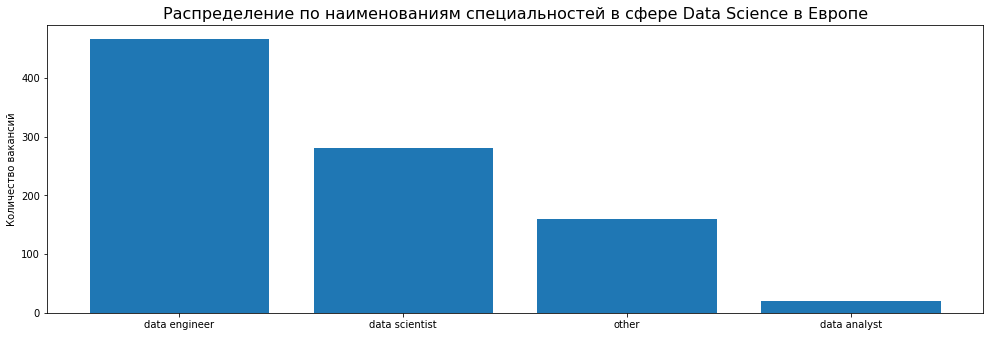

In [1561]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_eu['speciality'].value_counts().index, height = df_eu['speciality'].value_counts());
axes.set_title('Распределение по наименованиям специальностей в сфере Data Science в Европе', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 3.3. США

In [1562]:
df_us['speciality'].value_counts()

data engineer     262
data analyst      238
data scientist    203
other              31
Name: speciality, dtype: int64

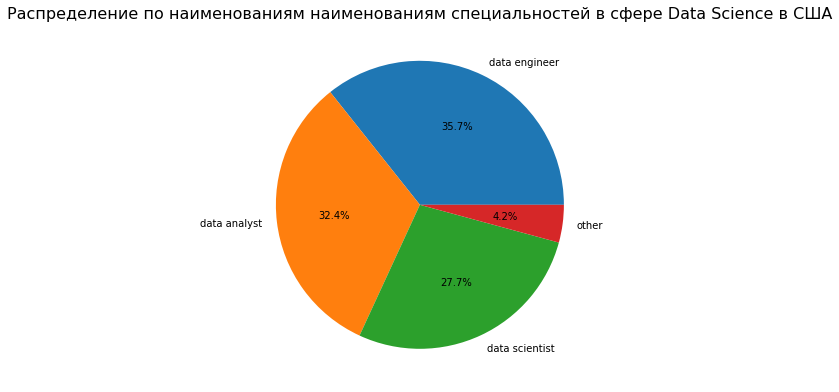

In [1563]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_us['speciality'].value_counts(),
    labels=df_us['speciality'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по наименованиям наименованиям специальностей в сфере Data Science в США', fontsize=16)
plt.show()

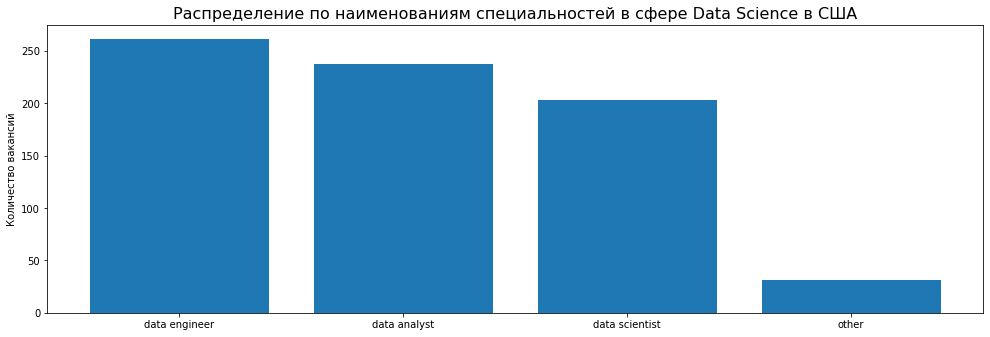

In [1564]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df_us['speciality'].value_counts().index, height = df_us['speciality'].value_counts());
axes.set_title('Распределение по наименованиям специальностей в сфере Data Science в США', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 3.4. Общее

In [1565]:
df['speciality'].value_counts()

data engineer     802
data scientist    614
data analyst      281
other             191
Name: speciality, dtype: int64

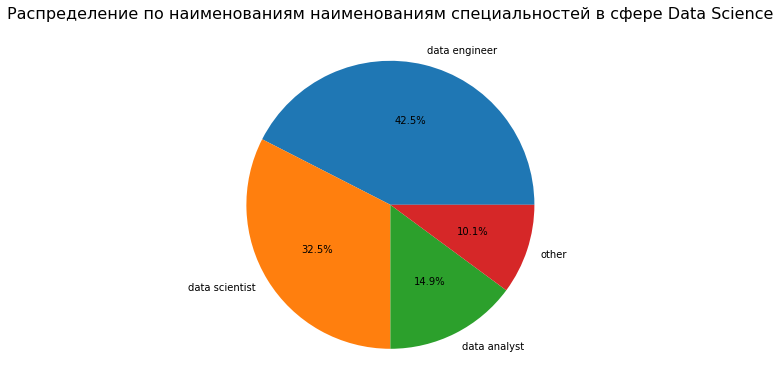

In [1566]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df['speciality'].value_counts(),
    labels=df['speciality'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по наименованиям наименованиям специальностей в сфере Data Science', fontsize=16)
plt.show()

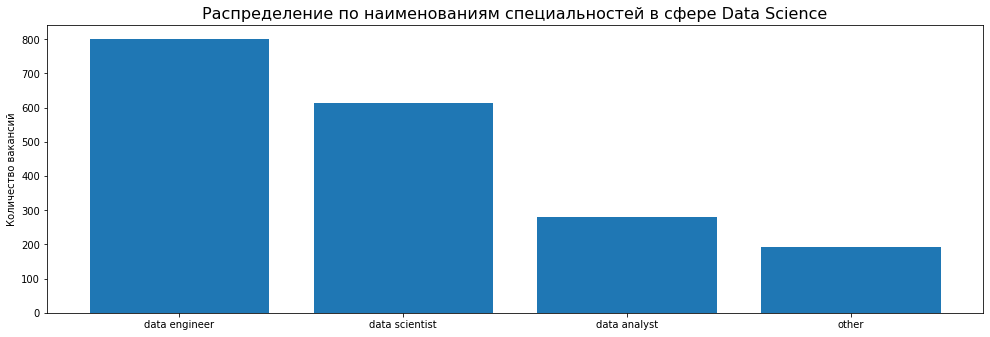

In [1567]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = df['speciality'].value_counts().index, height = df['speciality'].value_counts());
axes.set_title('Распределение по наименованиям специальностей в сфере Data Science', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

##4. Загруженность

### 4.1. Россия

In [1568]:
df_ru['schedule'].value_counts()

Полный рабочий день    210
Частичная занятость     17
Name: schedule, dtype: int64

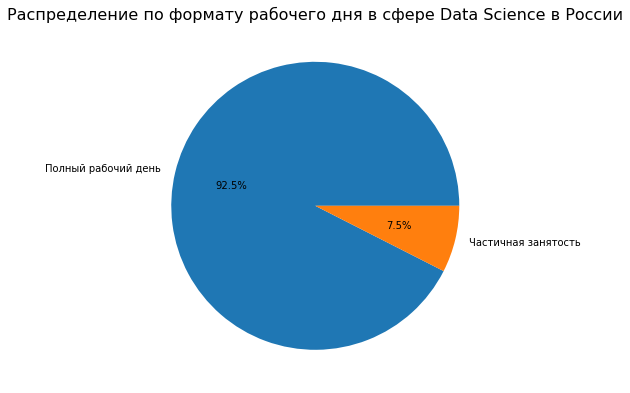

In [1569]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_ru['schedule'].value_counts(),
    labels=df_ru['schedule'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по формату рабочего дня в сфере Data Science в России', fontsize=16)
plt.show()

### 4.2. Европа

In [1570]:
df_eu['schedule'].value_counts()

Полный рабочий день    927
Name: schedule, dtype: int64

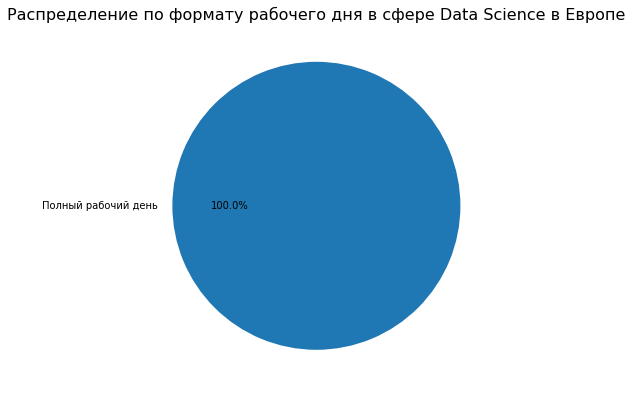

In [1571]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_eu['schedule'].value_counts(),
    labels=df_eu['schedule'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по формату рабочего дня в сфере Data Science в Европе', fontsize=16)
plt.show()

### 4.3. США

In [1572]:
df_us['schedule'].value_counts()

Полный рабочий день    732
Частичная занятость      2
Name: schedule, dtype: int64

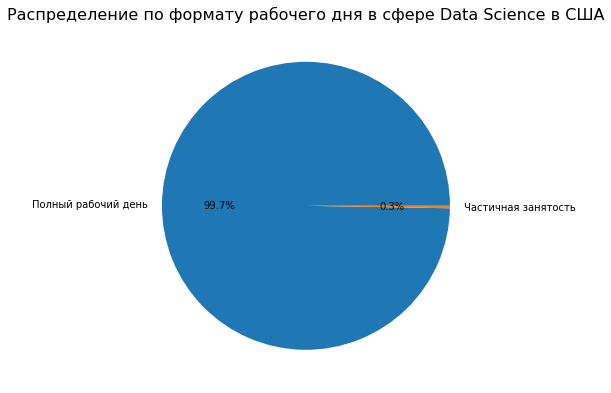

In [1573]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_us['schedule'].value_counts(),
    labels=df_us['schedule'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по формату рабочего дня в сфере Data Science в США', fontsize=16)
plt.show()

### 4.4. Общее

In [1574]:
df['schedule'].value_counts()

Полный рабочий день    1869
Частичная занятость      19
Name: schedule, dtype: int64

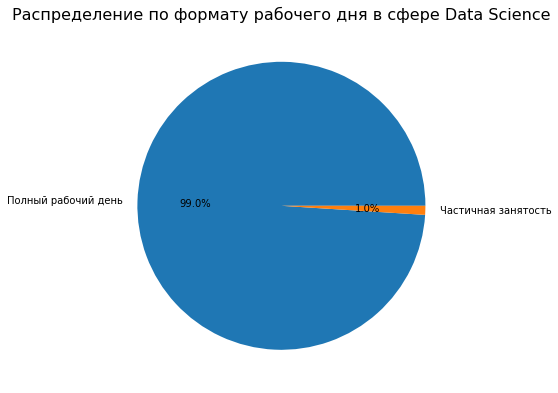

In [1575]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df['schedule'].value_counts(),
    labels=df['schedule'].value_counts().index,
    autopct='%.1f%%',
);
axes.set_title('Распределение по формату рабочего дня в сфере Data Science', fontsize=16)
plt.show()

## 5. Зарплата

In [1576]:
df['salary'].value_counts()

0    1832
1      56
Name: salary, dtype: int64

##6. Компании

### 6.1. Россия

In [1577]:
top5_company_ru = df_ru['company_name'].value_counts().tail(5)

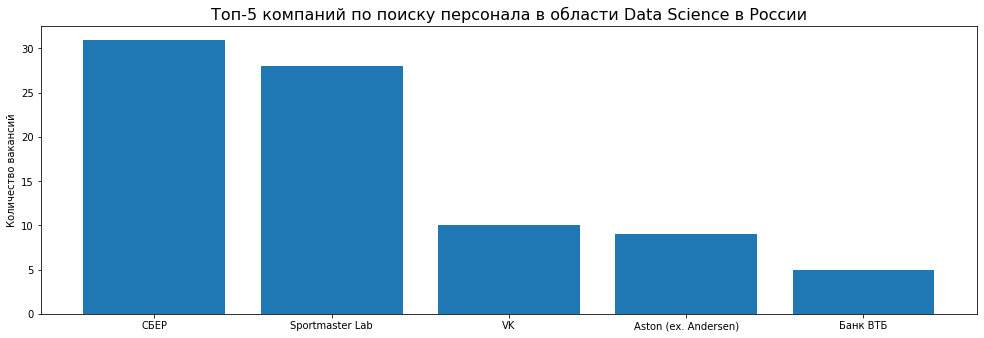

In [1578]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = top5_company_ru.index, height = top5_company_ru);
axes.set_title('Топ-5 компаний по поиску персонала в области Data Science в России', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 6.2. Европа

In [1579]:
top5_company_eu = df_eu['company_name'].value_counts().head(5)

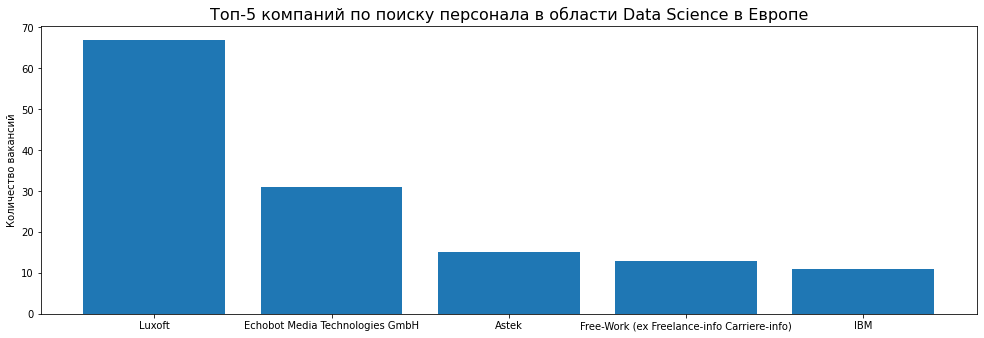

In [1580]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = top5_company_eu.index, height = top5_company_eu);
axes.set_title('Топ-5 компаний по поиску персонала в области Data Science в Европе', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 6.3. США

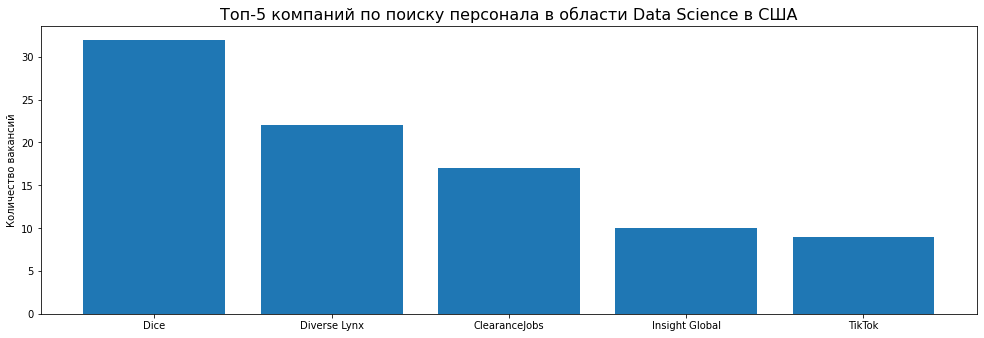

In [1581]:
top5_company_us = df_us['company_name'].value_counts().head(5)
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = top5_company_us.index, height = top5_company_us);
axes.set_title('Топ-5 компаний по поиску персонала в области Data Science в США', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

### 6.4. Общее

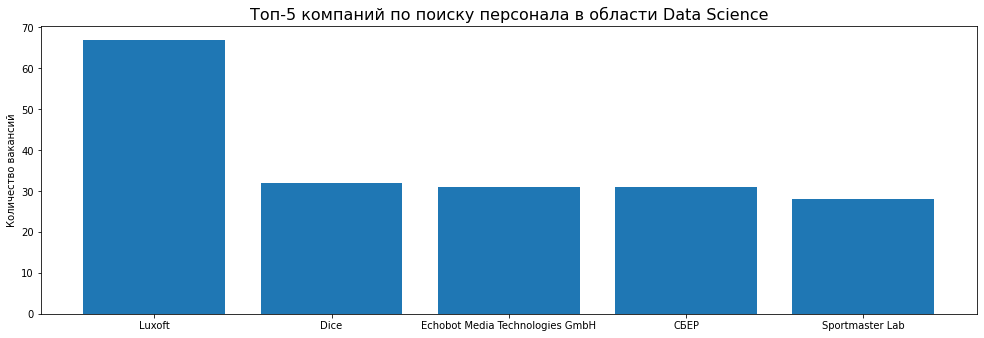

In [1582]:
top5_company = df['company_name'].value_counts().head(6)
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = top5_company[1:].index, height = top5_company[1:]);
axes.set_title('Топ-5 компаний по поиску персонала в области Data Science', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

**Вывод:** Две российские компании находятся в топ-5 компаний по числу размещенных вакансий в области Data Science в исследуемых регионах

##7. Месторасположение рабочих мест

### 7.1. Россия

In [1612]:
top5_city_russia = df_ru.loc[df_ru['city'] != 'Unknown'].city.value_counts()
top5_city_russia = top5_city_russia.head()
top5_city_russia

Moscow              139
Saint Petersburg     24
Novosibirsk           6
Kazan                 6
Ekaterinburg          3
Name: city, dtype: int64

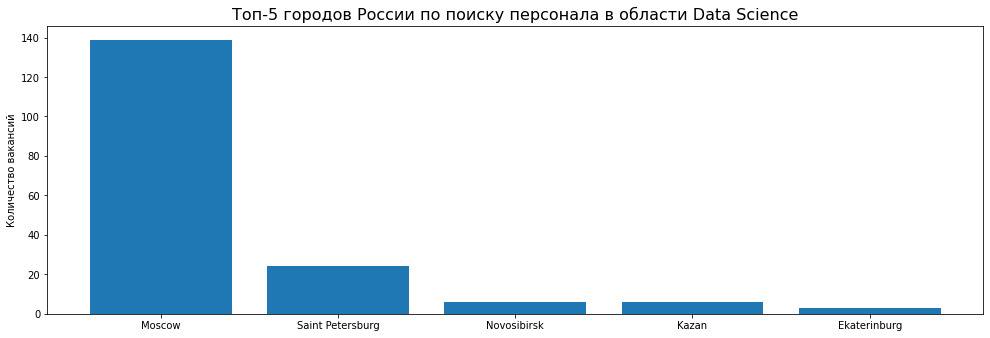

In [1611]:
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = top5_city_russia.index, height = top5_city_russia);
axes.set_title('Топ-5 городов России по поиску персонала в области Data Science', fontsize=16)
axes.set_ylabel('Количество вакансий')
plt.show()

**Вывод:** В России подавляющее большинство вакансий в сфере Data Science в г. Москве. На втором месте идет Санкт-Петербург. Далее располагаются такие города как Новосибирск, Казань, Екатеринбург.

### 7.2. Европа

In [1585]:
df_eu.loc[df_eu['area'] == 'Германия', 'area'] = 'Germany'
df_eu.loc[df_eu['area'] == 'Франция', 'area'] = 'France'
df_eu.loc[df_eu['area'] == 'Польша', 'area'] = 'Poland'
df_eu.loc[df_eu['area'] == 'Испания', 'area'] = 'Spain'
df_eu.loc[df_eu['area'] == 'Бельгия', 'area'] = 'Belgium'
df_eu.loc[df_eu['area'] == 'Голландия', 'area'] = 'Netherlands'
df_eu.loc[df_eu['area'] == 'Нидерланды', 'area'] = 'Netherlands'
df_eu.loc[df_eu['area'] == 'Голладния', 'area'] = 'Netherlands'
df_eu.loc[df_eu['area'] == 'Италия', 'area'] = 'Italy'
df_eu.loc[df_eu['area'] == 'Финляндия', 'area'] = 'Finland'
df_eu.loc[df_eu['area'] == 'Швеция', 'area'] = 'Swedeny'
df_eu.loc[df_eu['area'] == 'Чехия', 'area'] = 'Czech'
df_eu.loc[df_eu['area'] == 'Румыния', 'area'] = 'Romania'
df_eu.loc[df_eu['area'] == 'Ирландия', 'area'] = 'Irland'
df_eu.loc[df_eu['area'] == 'Австрия', 'area'] = 'Austria'
df_eu.loc[df_eu['area'] == 'Греция', 'area'] = 'Greece'
df_eu.loc[df_eu['area'] == 'Португалия', 'area'] = 'Portugal'
df_eu.loc[df_eu['area'] == 'Дания', 'area'] = 'Denmark'
df_eu.loc[df_eu['area'] == 'Венгрия', 'area'] = 'Hungary'
df_eu.loc[df_eu['area'] == 'Литва', 'area'] = 'Litva'
df_eu.loc[df_eu['area'] == 'Норвегия', 'area'] = 'Norway'
df_eu.loc[df_eu['area'] == 'Люксембург', 'area'] = 'Luxembourg'
df_eu.loc[df_eu['area'] == 'Словакия', 'area'] = 'Slovakia'
df_eu.loc[df_eu['area'] == 'Болгария', 'area'] = 'Bulgaria'
df_eu.loc[df_eu['area'] == 'Словения', 'area'] = 'Slovenia'
df_eu.loc[df_eu['area'] == 'Латвия', 'area'] = 'Latvia'
df_eu.loc[df_eu['area'] == 'Лихтенштейн', 'area'] = 'Liechtenstein'





In [1586]:
df_eu['area'].value_counts()

Germany          272
France           157
Poland           110
Netherlands       65
Spain             63
Belgium           41
Italy             32
Finland           25
Swedeny           22
Czech             18
Romania           16
Irland            15
Austria           14
Greece            13
Portugal          10
Denmark           10
Hungary            9
Litva              8
Norway             7
Luxembourg         6
Slovakia           5
Bulgaria           5
Slovenia           2
Latvia             1
Liechtenstein      1
Name: area, dtype: int64

In [1587]:
df_eu_geo = df_eu.groupby('area').count()

In [1588]:
fig = px.choropleth( 
    data_frame=df_eu_geo,  
    locations=df_eu_geo.index,  
    locationmode = "country names",  
    scope="europe", 
    color="Unnamed: 0", 
    range_color=[0, 300],  
    title='Количество вакансий по странам в Европе',  
    width=1000,  
    height=1000,  
    color_continuous_scale='Reds' 
) 
 
# отображаем график 
fig.show()

**Вывод:** В топ-3 стран Европы по количеству вакансий в сфере Data Science входят:

+ Германия (272 вакансии)

+ Франция (157 вакансий)

+ Польша (110 вакансий)